Preparación de Datos

In [3]:

import pandas as pd

exp1 = pd.read_excel("Dataset/RawData/20m/exp1.xlsx")
exp2 = pd.read_excel("Dataset/RawData/20m/exp2.xlsx")
exp3 = pd.read_excel("Dataset/RawData/25m/exp3.xlsx")
exp4 = pd.read_excel("Dataset/RawData/25m/exp4.xlsx")

# Agregar etiquetas de distancia
exp1["distancia"] = 20
exp2["distancia"] = 20
exp3["distancia"] = 25
exp4["distancia"] = 25

df = pd.concat([exp1, exp2, exp3, exp4], ignore_index=True)


print(df)

   Mote id  P1  P2  P3  P4  P5  P6  P7  P8  P9  ...  P2992  P2993  P2994  \
0    Mote1   1   1   1   1   1   1   1   1   1  ...      1      1      1   
1    Mote2   1   1   1   0   0   0   0   0   0  ...      0      0      1   
2    Mote3   1   1   1   1   1   1   1   1   1  ...      1      1      1   
3    Mote4   0   0   1   0   0   0   1   0   1  ...      0      0      0   
4    Mote5   1   1   1   1   1   1   1   1   1  ...      0      0      1   
5    Mote6   1   1   1   1   1   1   1   1   1  ...      1      1      1   
6    Mote7   1   1   1   1   1   1   1   1   1  ...      1      1      1   
7    Mote8   1   1   1   1   1   1   1   1   1  ...      1      1      1   
8    Mote9   1   1   1   1   1   1   1   1   1  ...      0      0      1   
9   Mote10   1   1   1   1   1   1   1   1   1  ...      0      0      1   
10  Mote11   1   1   1   1   1   1   1   1   1  ...      1      1      1   
11  Mote12   1   1   1   1   1   1   1   1   1  ...      1      1      1   
12  Mote13  

In [4]:
#Calculo de métricas para cada mote

import numpy as np
import pandas as pd

# Filas = motes, Columnas de paquetes
packet_cols = [col for col in df.columns if col.startswith("P")]

def longest_zero_streak(row):
    """Calcula la mayor racha consecutiva de ceros"""
    max_streak = streak = 0
    for val in row:
        if val == 0:
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0
    return max_streak

# Métricas por fila
df_metrics = pd.DataFrame()
#identificador del mote
df_metrics["Mote id"] = df["Mote id"]
#distancia del experimento
df_metrics["distancia"] = df["distancia"]
#tasa de éxito
df_metrics["success_rate"] = df[packet_cols].mean(axis=1)
#cantidad de pérdidas
df_metrics["loss_count"] = (df[packet_cols] == 0).sum(axis=1)
#varianza de la recepción
df_metrics["varianza"] = df[packet_cols].var(axis=1)
#racha más larga de pérdidas
df_metrics["longest_loss_streak"] = df[packet_cols].apply(longest_zero_streak, axis=1)

#moostrar las métricas
print(df_metrics)

   Mote id  distancia  success_rate  loss_count  varianza  longest_loss_streak
0    Mote1         20      0.941333         176  0.055243                   28
1    Mote2         20      0.888000         336  0.099489                   80
2    Mote3         20      1.000000           0  0.000000                    0
3    Mote4         20      0.396333        1811  0.239333                  144
4    Mote5         20      0.873667         379  0.110410                   86
5    Mote6         20      0.883667         349  0.102834                   54
6    Mote7         20      0.844667         466  0.131249                   86
7    Mote8         20      0.991000          27  0.008922                   12
8    Mote9         20      0.637667        1087  0.231125                  241
9   Mote10         20      0.380000        1860  0.235679                  317
10  Mote11         20      0.826333         521  0.143554                  127
11  Mote12         20      0.995000          15  0.0

In [5]:
#Construccion del modelo

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df_metrics.drop(columns=["Mote id", "distancia"])
y = df_metrics["distancia"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          20       0.50      0.62      0.56         8
          25       0.62      0.50      0.56        10

    accuracy                           0.56        18
   macro avg       0.56      0.56      0.56        18
weighted avg       0.57      0.56      0.56        18



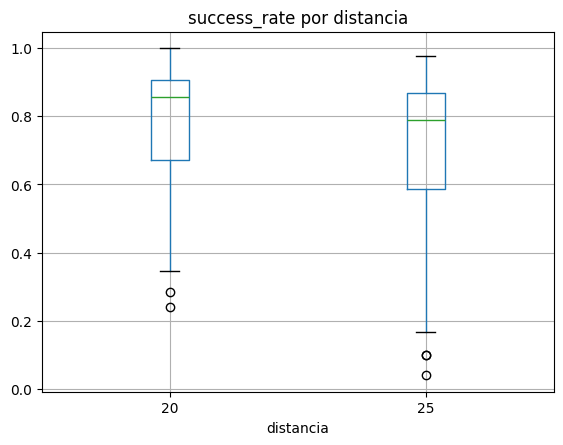

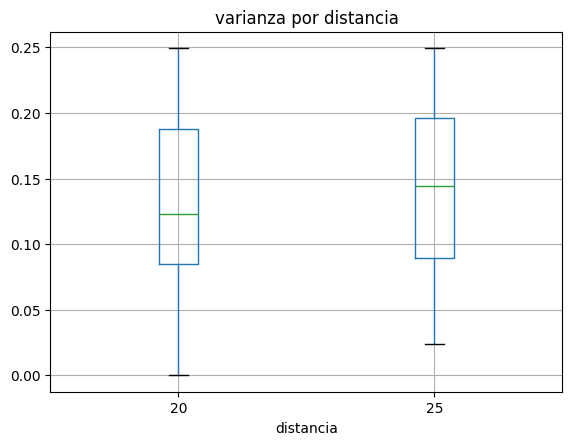

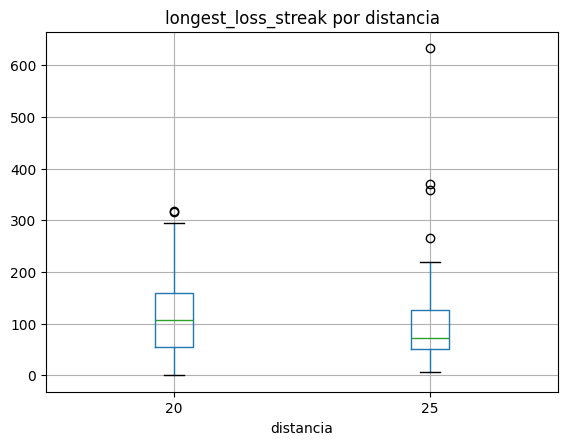

In [6]:
import matplotlib.pyplot as plt

for metric in ["success_rate", "varianza", "longest_loss_streak"]:
    df_metrics.boxplot(column=metric, by="distancia")
    plt.title(f"{metric} por distancia")
    plt.suptitle("")
    plt.show()